# Time series analysis - Example code 10: Residual analysis

**Lund University, Lund, Sweden**

**Reference:**  
"An Introduction to Time Series Modeling", 4th ed, by Andreas Jakobsson  
Studentlitteratur, 2021

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Import custom functions from tsa_lth library
import sys
sys.path.append('../TimeSeriesAnalysis-main/TimeSeriesAnalysis-main')
from tsa_lth.modelling import estimateARMA
from tsa_lth.analysis import plotACFnPACF, normplot
from tsa_lth.tests import whiteness_test, check_if_normal

## Load the tobacco data

In [2]:
# Load the tobacco production data
df = pd.read_csv('../data/tobacco_data.csv')
data = df['production'].values
print(f"Data length: {len(data)}")

noLags = 25  # How many lags should we trust? Recall: not more than N/4.

Data length: 114


## Recall the model from code 4

The model uses:
- $C(q) = 1$
- $A(q) = (1+q)(1-q) = 1 - q^2$

In [3]:
Cm = np.array([1])
Am = np.convolve([1, 1], [1, -1]) 

## Let's estimate the model again and check if it's white

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 0.9951(±0.0164)·z⁻²

Polynomial orders: nA = 2
Number of free coefficients: 1
Fit to estimation data (NRMSE): 56.42%
FPE : 63311.257  MSE : 62993.154
AIC : 1557.53   BIC : 1560.248



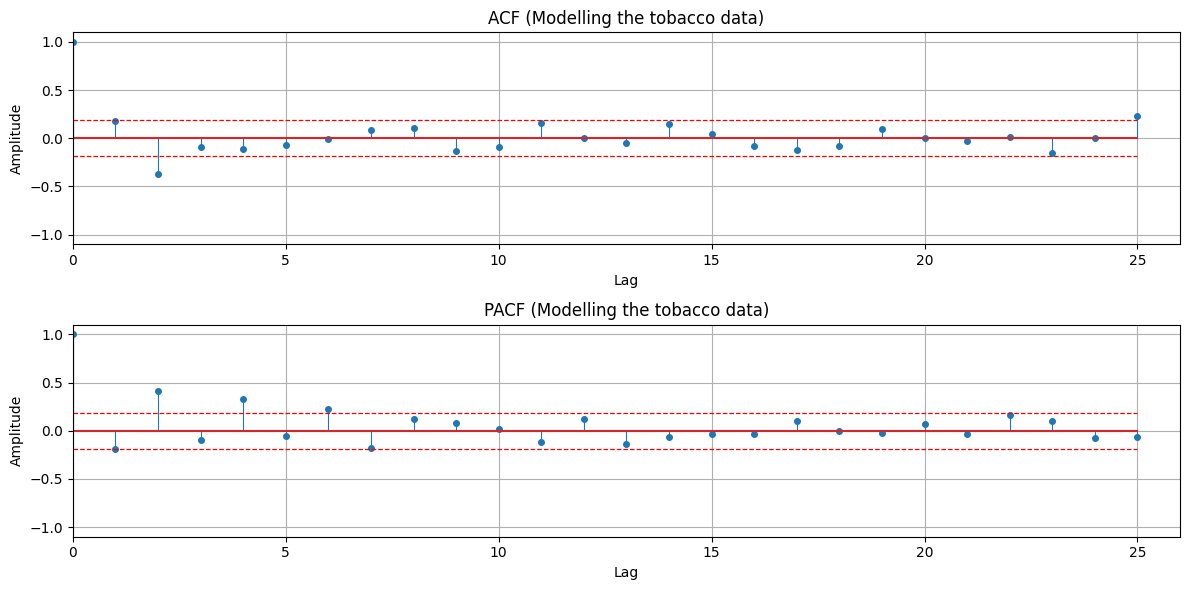

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 48.66 < 37.65)
  McLeod-Li test:        False (white if 53.69 < 37.65)
  Monti test:            False (white if 66.16 < 37.65)
  Sign change test:      True (white if 0.46 in [0.41,0.59])
Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 48.66 < 37.65)
  McLeod-Li test:        False (white if 53.69 < 37.65)
  Monti test:            False (white if 66.16 < 37.65)
  Sign change test:      True (white if 0.46 in [0.41,0.59])


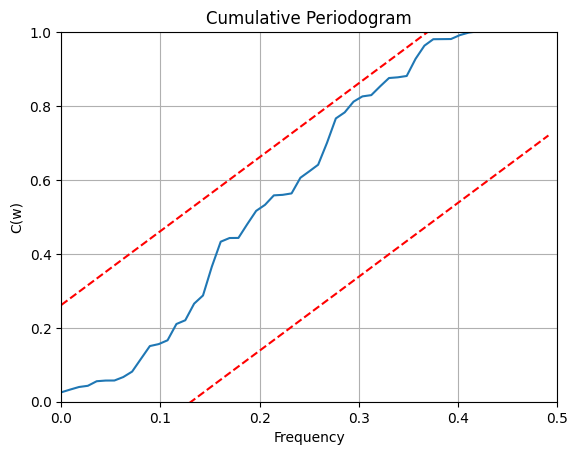

In [4]:
modelFirst = estimateARMA(data, A=Am, C=Cm, titleStr='Modelling the tobacco data', noLags=noLags)
ey = modelFirst.resid

whiteness_test(ey, K=noLags, plotCumPer=True)

## What happened - why is it not white now?

Can you see the problem? Let's fix it.

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 0.6286(±0.0884)·z⁻¹ - 0.3714(±0.0887)·z⁻²

Polynomial orders: nA = 2
Number of free coefficients: 2
Fit to estimation data (NRMSE): 63.8%
FPE : 44795.797  MSE : 43470.312
AIC : 1517.984   BIC : 1523.421



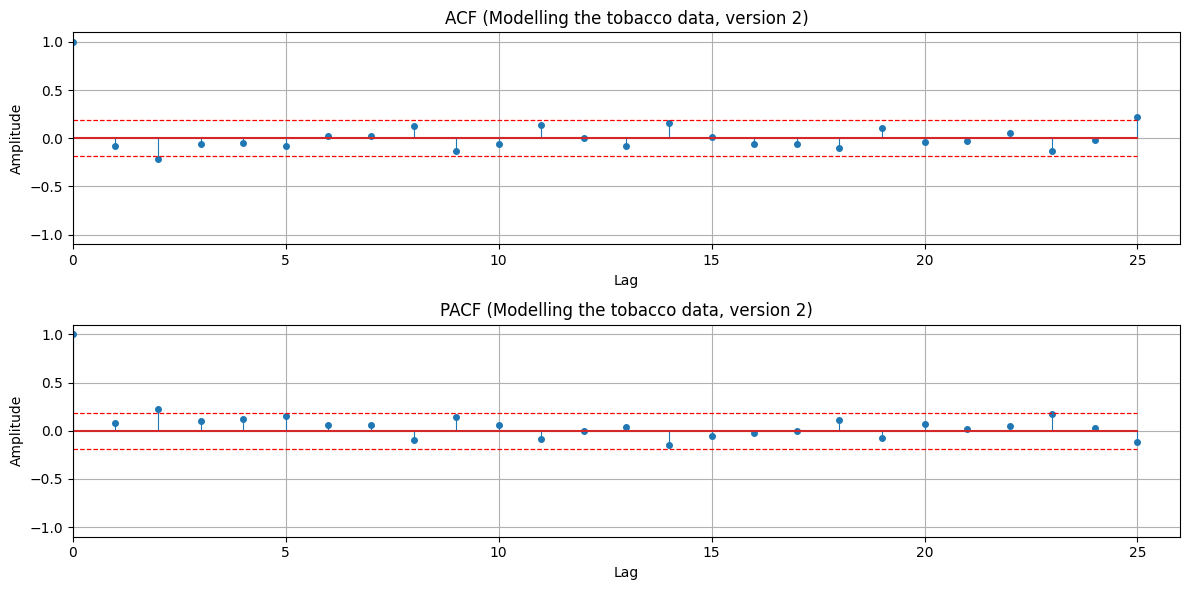

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 32.58 < 37.65)
  McLeod-Li test:        True (white if 26.81 < 37.65)
  Monti test:            True (white if 32.38 < 37.65)
  Sign change test:      True (white if 0.56 in [0.41,0.59])


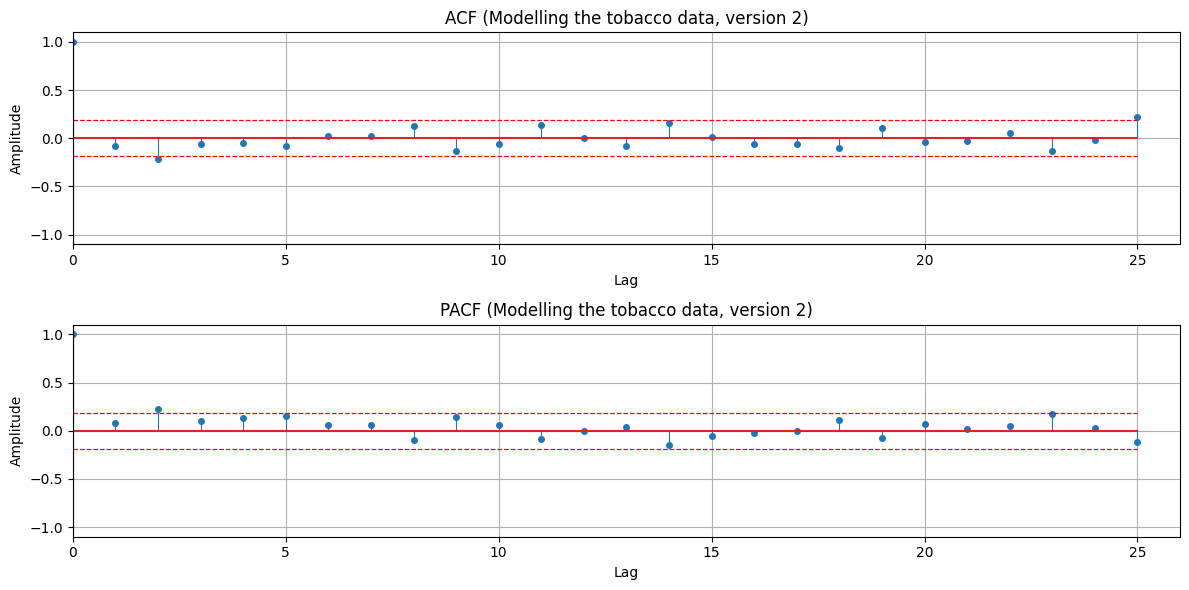

In [5]:
modelFixed = estimateARMA(data, A=2, C=0, titleStr='Modelling the tobacco data, version 2', noLags=noLags)
ey = lfilter(modelFixed.A, modelFixed.C, data)
ey = ey[len(modelFixed.A):]
acfEst, pacfEst = plotACFnPACF(ey, noLags, 'Modelling the tobacco data, version 2', return_val=True)

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 32.39 < 37.65)
  McLeod-Li test:        True (white if 26.37 < 37.65)
  Monti test:            True (white if 32.14 < 37.65)
  Sign change test:      True (white if 0.55 in [0.41,0.59])


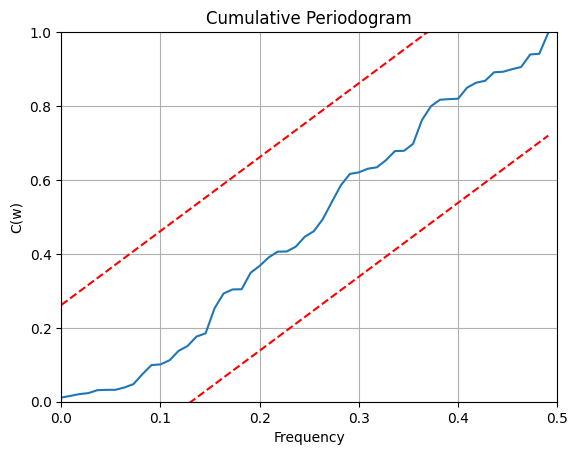

In [6]:
whiteness_test(ey, K=noLags, plotCumPer=True)

## Ok, so now it is white

The issue is with parameter constraints - when you specify the structure, only non-zero coefficients are estimated. Are the ACF and PACF normal distributed?

## What does the D'Agostino-Pearson's K2 test indicate?

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


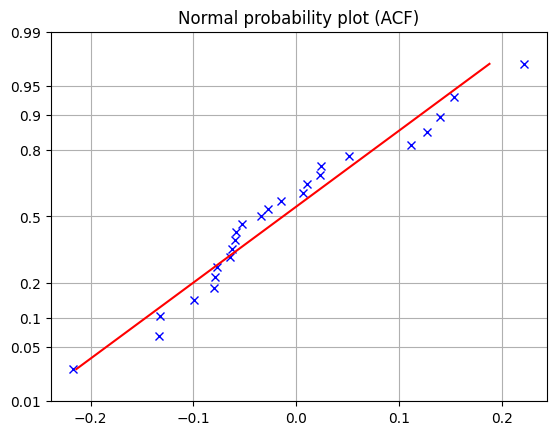

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


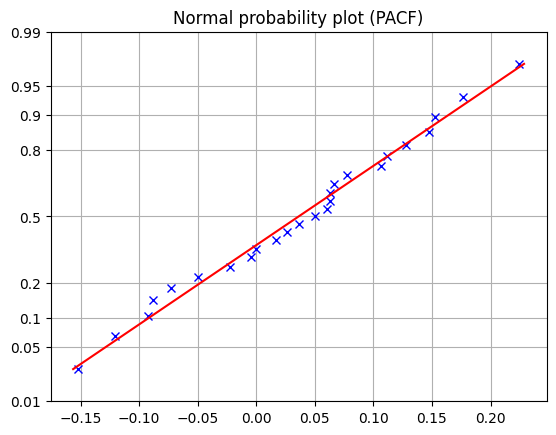

In [7]:
check_if_normal(acfEst[1:], which_test='D')
normplot(acfEst[1:], titleStr='ACF')

check_if_normal(pacfEst[1:], which_test='D')
normplot(pacfEst[1:], titleStr='PACF')

## What does the Jarque-Bera test indicate?

The Jarque-Bera test indicates that the data is NORMAL distributed!


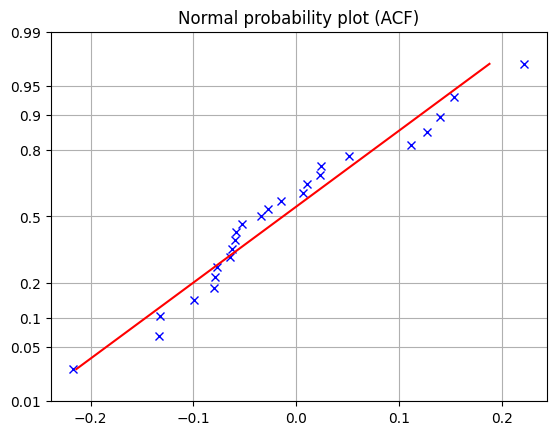

The Jarque-Bera test indicates that the data is NORMAL distributed!


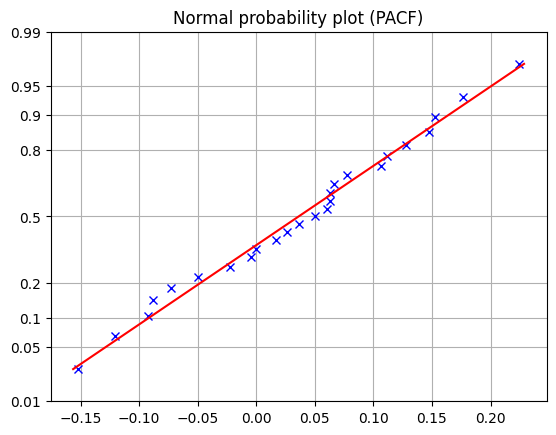

In [8]:
check_if_normal(acfEst[1:], which_test='J')
normplot(acfEst[1:], titleStr='ACF')

check_if_normal(pacfEst[1:], which_test='J')
normplot(pacfEst[1:], titleStr='PACF')